#ML - Clustering_SOM

<p><strong>Objetivo: </strong> El objetivo de este cuaderno es aplicar el algoritmo de SOM a un conjunto de datos sencillos. </p>

##Cargar los datos

Para este ejercicio se estará utilizando el conjunto de datos Iris, la cual es una fuente en línea en formato CSV (valores separados por coma).
<p> Este set de datos posee diferentes medidas sobre la planta Iris y es famosamente utilizado como ejemplo en analítica de datos:
  </p>
Se utiliza este conjunto para ejemplificar la creación de clusters:

<ul>
  <li>descripción: <a href="https://archive.ics.uci.edu/ml/datasets/Iris" target="_blank">https://archive.ics.uci.edu/ml/datasets/Iris</a></li>
  <li>fuente de datos: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data</a></li>
    <li>tipo de datos: csv</li>

Se va a utilizar la librería Pandas de Python para realizar la lectura de archivos. Se cargan los datos, se agregan cabeceras y se muestra el resultado:

In [0]:
# Importar librerias requeridas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer datos desde archivo CSV
csv_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(csv_path,sep=",",header= None)

# Cargar cabeceras
headers = ["sepal_length","sepal_width","petal_length","petal_width","class"]
df.columns = headers

df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


##Aplicar Algoritmo SOM

Existen varias implementaciones de SOM en Python. Para este ejemplo se va a utilizar la librería <b>MINISON</b> la cual permite generar clusters a partir de datos entrados al algoritmo.

<p>Databricks no trae esa librería por defecto por lo que es necesario instalarla con el comando <b>PIP</b>. El comando PIP permite instalar librerías que no vengan por defecto en el ambiente de desarrollo. Si no está usando Databricks elimine el comando <b>%sh</b>:</p>

In [0]:
%sh
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8603 sha256=0525a3cd567ea1e1d9470032632587838445c81ada58e985031c93ebc1e1aa39
  Stored in directory: /root/.cache/pip/wheels/b2/b8/f9/08876fa31be00070d6a60686b9842e044d1a9b471e8d6772d4
Successfully built minisom
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


Seleccione solo las columnas numéricas para utilizar con el algoritmo:

In [0]:
df_som = df[["sepal_length","sepal_width","petal_length","petal_width"]]

<p>Importe las librerías necesarias para aplicar el algoritmo y visualizar los resultados.</p>
<p>La función <b>MiniSom</b> recibe los siguientes parámetros:</p>
<p>   el tamaño del som: se utiliza una red de 10x10</p>
<p>   la cantidad de columnas: son 4 cuatro columnas en el conjunto de datos</p>
<p>   sigma: el radio para la vecindad, se utiliza un valor de 0.5</p>
<p>   learning_rate: la tasa de aprendizaje para ajustar los pesos, se utiliza un valor de 0.5</p>
<p>Finalmente se realizan 50mil iteraciones sobre los datos. Se puede utilizar una de las dos opciones de entrenamiento que brinda esta implementación: train_batch o train_random. El primero usa muestras en el orden en el que se registran en el conjunto de datos, mientras que el segundo selecciona aleatoriamente las muestras.</p>

In [0]:
#importar el modelo SOM
from minisom import MiniSom    
from matplotlib.gridspec import GridSpec

# inicializar el modelo
som = MiniSom(10, 10, 4, sigma=0.5, learning_rate=0.5)
# inicializar los pesos
som.random_weights_init(df_som.to_numpy())
# entrenar el modelo
som.train_random(df_som.to_numpy(), 50000)

<p>En el gráfico se puede ver una agrupación clara de datos.</p>
<p>Como se esperaba de estudios previos sobre este conjunto de datos, los patrones se agrupan según la clase a la que pertenecen, y una pequeña fracción de Iris versicolor(cluster1) se mezcla con Iris virginica(cluster2).</p>
<p>Cada vez que se ejecute el algoritmo el gráfico mostrará resultados similares pero no iguales, pues los pesos son inicializados de manera aleatoria</p>
<p>A continuación el código para visualizar el gráfico:</p>

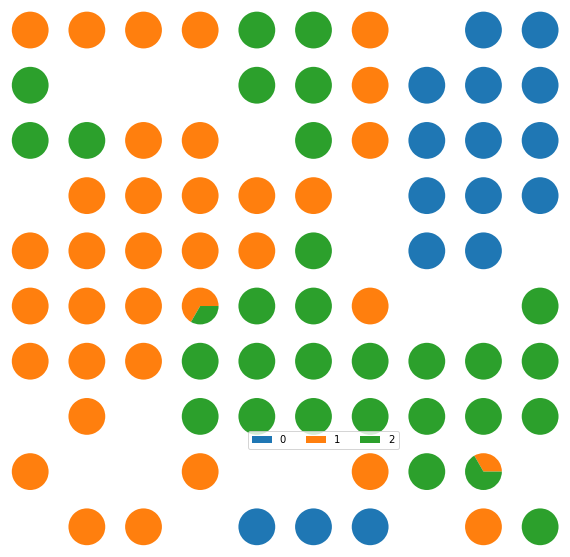

In [0]:
#Mapea Setosa=0 Versicolor=1 Virginica=2
target = df["class"].astype("category").cat.codes
labels_map = som.labels_map(df_som.to_numpy(), target)
label_names = np.unique(target)

plt.figure(figsize=(11, 11))
the_grid = GridSpec(11, 11)

for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[10-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)

plt.show()

En el gráfico anterior se puede apreciar como el algoritmo de SOM ha agrupado las tres especies. Cada especie representa un color, y en este caso, que tenemos la categoría lo podemos mostrar con colores. Algunos nodos han quedado mixtos, significa que poseen especies de dos tipos diferentes de plantas. Si usted corre este código en su computador pueden quedar diferentes resultados dado que los pesos se inicializan de manera aleatoria.

Links interesantes:
<ul>
    <li>Documentación de la función Linkage - https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html</li>
    <li>MINISOM - https://github.com/JustGlowing/minisom</li>
<ul>